In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("BlackFriday.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
del df['Product_Category_2']

In [8]:
del df['Product_Category_3']

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

## Analysing the columns

In [10]:
df['User_ID'].nunique()  ## unique Customers

5891

In [11]:
df['Product_ID'].nunique()

3623

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df['Product_Category_1'].nunique()

18

In [17]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [18]:
 df["Purchase"].sum()/len(df['Purchase'])   # avg amount spent by a customer

9333.859852635065

In [19]:
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


## Analysing Gender

In [20]:
len(df[df['Gender']== 'M']), len(df[df['Gender']== 'F'])

(405380, 132197)

In [21]:
Data=pd.DataFrame({"Ratio" : [len(df[df['Gender']== 'M']), len(df[df['Gender']== 'F'])]}, index = ['M','F'])

<AxesSubplot:ylabel='Ratio'>

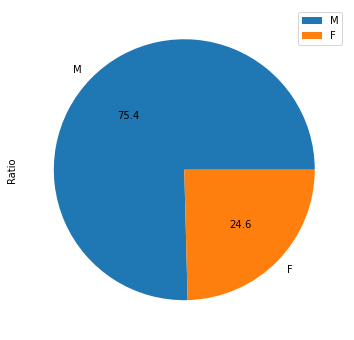

In [22]:
Data.plot.pie(y='Ratio', autopct = "%.1f", figsize=(6,6))

<AxesSubplot:title={'center':'Ratio of Purchases made by M/F'}, ylabel='None'>

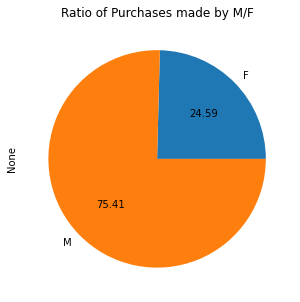

In [23]:
df.groupby('Gender').size().plot(kind = 'pie',
                                 autopct='%.2f',
                                 title = "Ratio of Purchases made by M/F",
                                 figsize=(5,5))

<AxesSubplot:xlabel='Gender'>

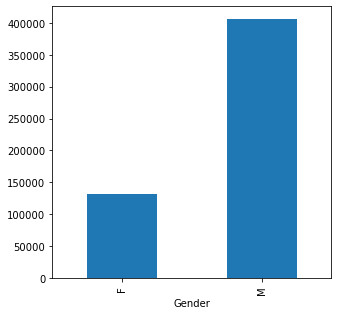

In [24]:
 df.groupby('Gender').size().plot(kind = 'bar',
                                 figsize=(5,5))

In [25]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<AxesSubplot:ylabel='Purchase'>

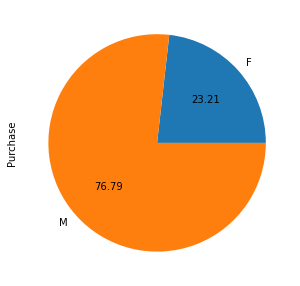

In [26]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie',
                                 autopct='%.2f',
                                 figsize=(5,5))

<AxesSubplot:ylabel='Purchase'>

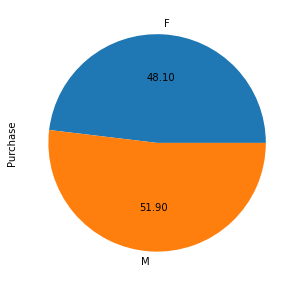

In [27]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie',
                                 autopct='%.2f',
                                 figsize=(5,5))

## Analysing Age and Martial Status

<AxesSubplot:title={'center':'Purchase distribution by age'}, xlabel='Age'>

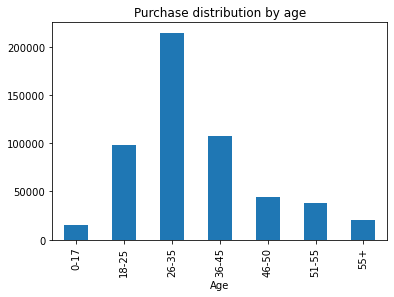

In [28]:
df.groupby('Age').size().plot(kind = 'bar', title="Purchase distribution by age")

In [39]:
lst = []

for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])

data= pd.DataFrame(lst, columns=['Age','Products'])

In [36]:
df[df['Age']==i]['Product_ID'].nunique()

3213

In [40]:
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<AxesSubplot:xlabel='Age'>

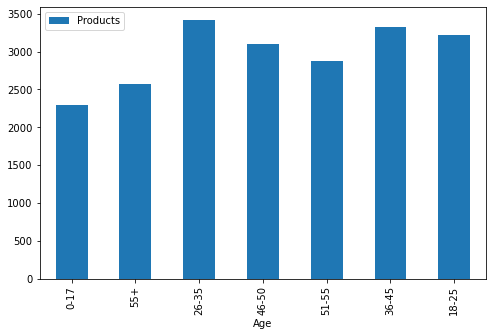

In [44]:
data.plot.bar(x='Age',figsize= (8,5))

<AxesSubplot:title={'center':'Purchase distribution by age'}, xlabel='Age'>

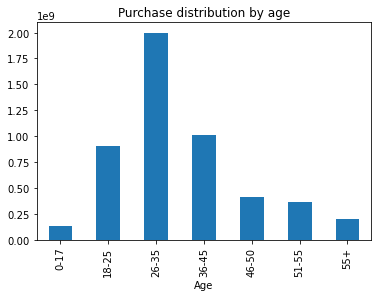

In [45]:
 df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', title="Purchase distribution by age")

<AxesSubplot:ylabel='Purchase'>

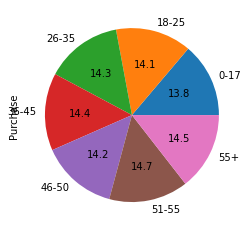

In [47]:
 df.groupby('Age').mean()['Purchase'].plot(kind='pie', autopct='%.01f')

<AxesSubplot:ylabel='None'>

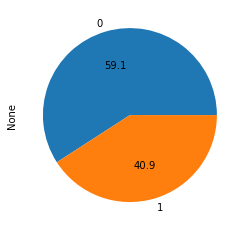

In [49]:
 df.groupby('Marital_Status').size().plot(kind='pie', autopct='%.01f')

# Multi-column Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

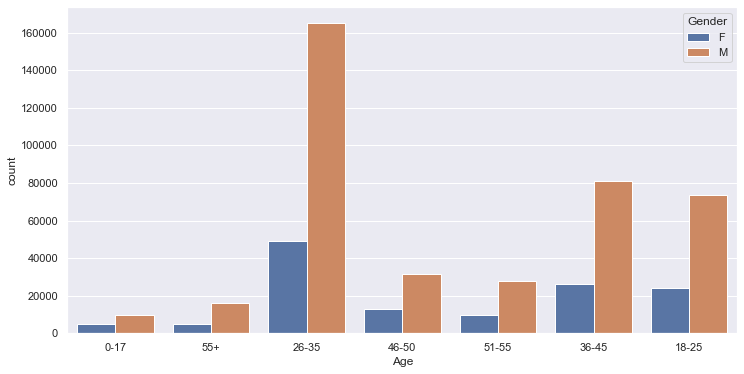

In [14]:
sns.set(rc ={'figure.figsize':(12,6)})
sns.countplot(x='Age', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

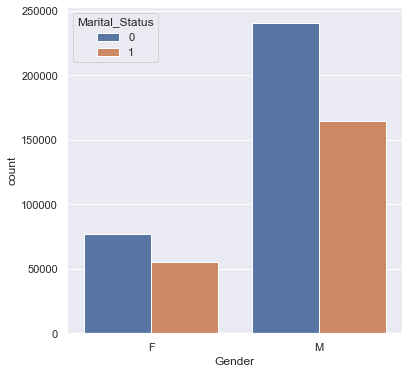

In [16]:
sns.set(rc ={'figure.figsize':(6,6)})

sns.countplot(x='Gender', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

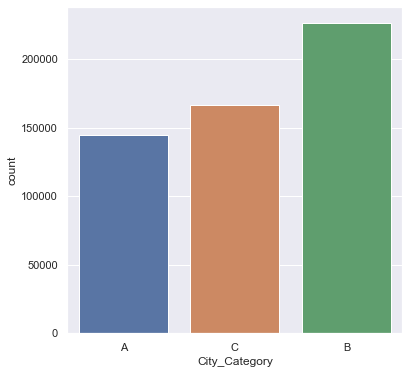

In [18]:
sns.countplot(x=df['City_Category'])

<AxesSubplot:ylabel='None'>

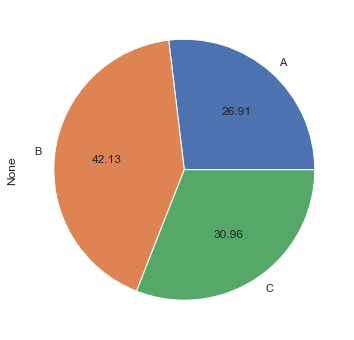

In [23]:
df.groupby('City_Category').size().plot(kind='pie', autopct="%.2f")

<AxesSubplot:xlabel='Age', ylabel='count'>

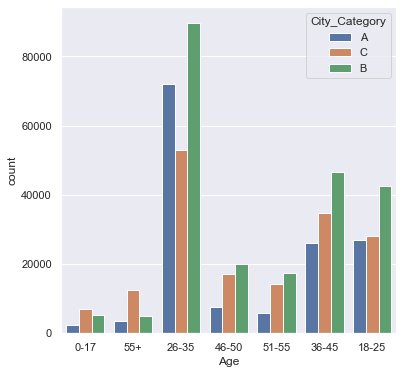

In [25]:
sns.countplot(x='Age', hue='City_Category', data = df)

# Occupation and Products Analysis

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

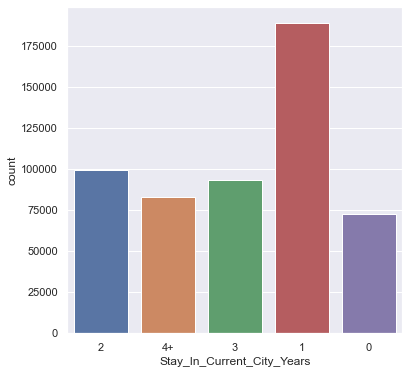

In [26]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

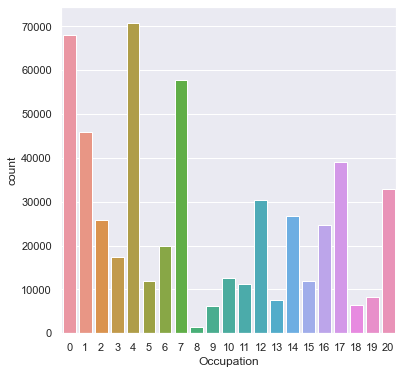

In [29]:
sns.countplot(x=df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

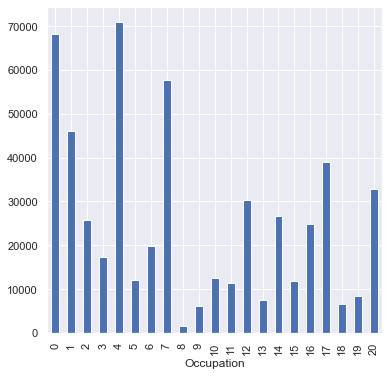

In [31]:
df.groupby('Occupation').size().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

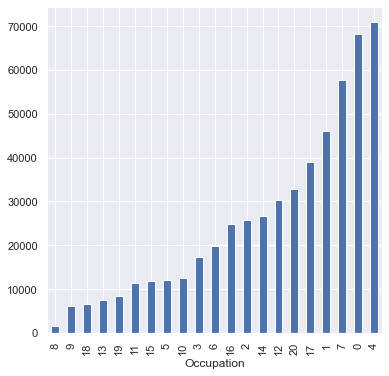

In [33]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

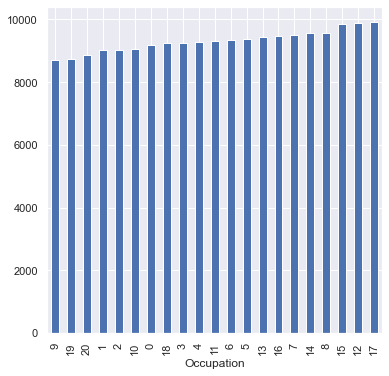

In [35]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

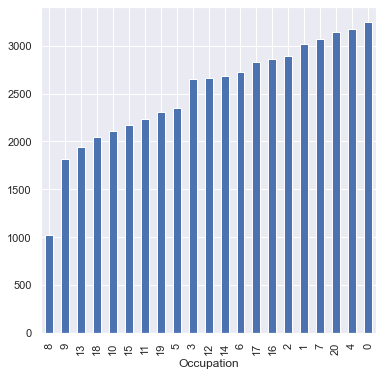

In [43]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

In [48]:
df.groupby('Product_Category_1').size()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
dtype: int64

<AxesSubplot:xlabel='Product_Category_1'>

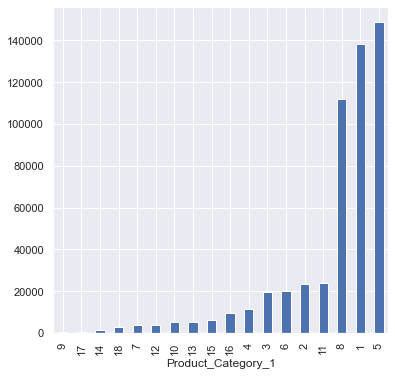

In [47]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

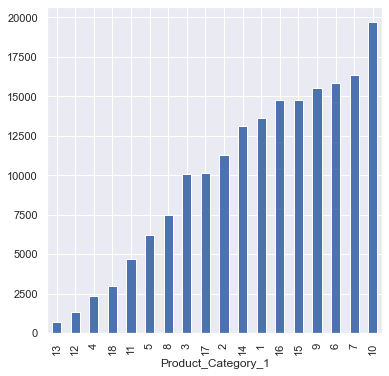

In [49]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

 # Combining Gender and Marital Status

In [54]:
l = []
for i in range(len(df)):
    l.append(df["Gender"][i]+"_"+str(df["Marital_Status"][i]))
df["MaritalGender"]= l


In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

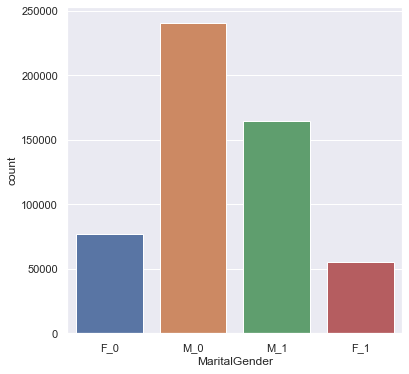

In [56]:
sns.countplot(x=df['MaritalGender'])